<a href="https://colab.research.google.com/github/ndow33/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [152]:
#import everything
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#2D vector
a = np.array([3,2])
a

array([3, 2])

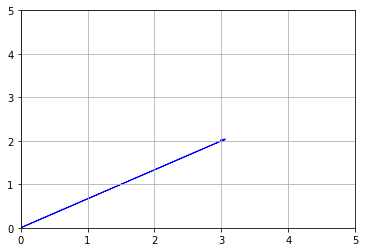

In [153]:
#graph vector a
fig, ax = plt.subplots()
ax.grid()
plt.xlim(0,5)
plt.ylim(0,5)
plt.arrow(0,0,*a, head_width=.05, color='blue')
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [154]:
#find the norm/length of b using np.linalg.norm
b = np.array([17, -4, -2, 1])
np.linalg.norm(b)

17.60681686165901

The Norm of the vector represents its length.

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [155]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

np.dot(c,d)

42

These vectors are not orthogonal because their dot product does not equal zero. 

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [156]:
#Create E matrix as a dataframe
E = [[7,4,2],[1,3,-1],[2,6,-4]]
E = pd.DataFrame(E)
E

,0,1,2
0,7,4,2
1,1,3,-1
2,2,6,-4


In [157]:
#Invert E using np.linalg.inv
E_inv = pd.DataFrame(np.linalg.inv(E))
E_inv

,0,1,2
0,0.176471,-0.823529,0.294118
1,-0.058824,0.941176,-0.264706
2,0.000000,1.000000,-0.500000


In [158]:
#Transpose E
E.T

,0,1,2
0,7,1,2
1,4,3,6
2,2,-1,-4


## 1.5 Find $|F|$ - What is one reason why the determinant of a matrix would be 0? 

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [159]:
#Create F as a DataFrame
F = [[2, -2, 5], [4,1,10],[12,6,30]]
F = pd.DataFrame(F)
F

,0,1,2
0,2,-2,5
1,4,1,10
2,12,6,30


In [160]:
#use np.linalg.det to find the determinant of F
np.linalg.det(F)

0.0

One reason why the determinant of a matrix would be 0 is there are infinite solutions to a system of equations. In other words there is no one unique solution. 

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, sample variance, and sample standard deviation for both the number of customers and inches of new snow for the week. Remember that on SCs you can use library functions, dataframes, .describe(), etc. 



In [0]:
customers = np.array([820, 760, 1250, 990, 1080, 1450, 1600])
snow = np.array([0, 1, 7, 1, 0, 6, 4])

In [162]:
#Mean
print('Customers: ', customers.mean())
print('Inches of new snow: ', snow.mean())

Customers:  1135.7142857142858
Inches of new snow:  2.7142857142857144


In [163]:
#Sample Variance
print('Customers: ', customers.var(ddof=1))
print('Snow: ', snow.var(ddof=1))

Customers:  98761.90476190478
Snow:  8.571428571428571


In [164]:
#sample standard deviation
print('Customers: ', customers.std(ddof=1))
print('Snow: ', snow.std(ddof=1))

Customers:  314.26406851866597
Snow:  2.9277002188455996


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

The variances of the number of customers and inches of snow are not comparable because you can't necessarily compare variances between sets of variables that have different scales. The variance of variables with higher values will always be higher. 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [165]:
#Make a DataFrame
snow_df = pd.DataFrame({"new_snow": snow, "customers": customers})
snow_df

,new_snow,customers
0,0,820
1,1,760
2,7,1250
3,1,990
4,0,1080
5,6,1450
6,4,1600


In [166]:
#find the variance-covariance matrix
snow_df.cov()

,new_snow,customers
new_snow,8.571429,670.238095
customers,670.238095,98761.904762


In [167]:
#find the correlation coefficient to see how comparable the variances are
snow_df.corr()

,new_snow,customers
new_snow,1.000000,0.728463
customers,0.728463,1.000000


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. 

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [168]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [169]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
df.dtypes

Country               object
Cheese                 int64
Carcass_Meat           int64
Other_Meat             int64
Fish                   int64
Fats_and_Oils          int64
Sugars                 int64
Fresh_Potatoes         int64
Fresh_Veg              int64
Other_Veg              int64
Processed_Potatoes     int64
Processed_Veg          int64
Fresh_Fruit            int64
Cereals                int64
Beverages              int64
Soft_Drinks            int64
Alcoholic Drinks       int64
Confectionery          int64
dtype: object

In [170]:
# check for number of categorical vs numeric columns
cat_cols = df.columns[df.dtypes=='object']
num_cols = df.columns[df.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

1 categorical columns
17 numerical columns


In [171]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  df[col] = df[col].index

print(df.shape)
df.head()

(4, 18)


,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [172]:
#standardize the data
from sklearn.preprocessing import StandardScaler
#this line takes the columns from df and puts them into a variable
feature_cols = df.columns[1:]
feature_cols[:5]

Index(['Cheese', 'Carcass_Meat', 'Other_Meat', 'Fish', 'Fats_and_Oils'], dtype='object')

In [0]:
#normalize the features
x = df.loc[:, feature_cols].values
x = StandardScaler().fit_transform(x)

In [206]:
#check the normalized data to see if its mean is zero and std is one
print('{:.2f}'.format(np.mean(x)))
print(np.std(x))

0.00
1.0


In [175]:
#convert the normalized features into a data frame
df_processed = pd.DataFrame(x,columns=feature_cols)
df_processed.head(3)

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. 

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
#use sklearn library to import the PCA module
from sklearn.decomposition import PCA

In [0]:
#instantiate the sklearn class
#pass the desired number of components
my_pca = PCA(n_components=2)

In [0]:
#call fit_transform on the aggregate data
pca_data = my_pca.fit_transform(x)

In [179]:
#create a dataframe that will have the principal component values for all samples
df_final = pd.DataFrame(data = pca_data, columns = ['PC1', 'PC2'])
df_final.head()

,PC1,PC2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


In [180]:
#How much variation did each principal component explain?
my_pca.explained_variance_ratio_

array([0.68327871, 0.24871288])

In [181]:
#How much total variance did we explain?
sum(my_pca.explained_variance_ratio_)

0.9319915970724626

In [182]:
#How much variance did we not explain(this is lost information)
1-sum(my_pca.explained_variance_ratio_)

0.0680084029275374

## 3.3 What are Eigenvalues and Eigenvectors? -In general, not just in PCA.

Eigenvalues are basically a scalar that is factored out of a matrix. By simplifying the matrix, you are left with an eigenvector.

The intuition behind eigenvalues and eigenvectors is that we can represent highly dimensional data within a matrix by diagonalizing it and creating standardized values in order to represent the data in a more meaningful way without losing too much of the original data itself.

##3.4 Scree Plot 
Create a Scree Plot to show the Proportion of Explained Variance of each Principal Component (more than the first two)

In [0]:
#create a pca with 4 components
# n_components=5 must be between 0 and min(n_samples, n_features)=4 with svd_solver='full'
my_pca_2 = PCA(n_components=4)

In [0]:
# Apply PCA to the data
pca_features = my_pca_2.fit_transform(df_processed)

In [185]:
# define the number of components
num_components=len(my_pca_2.explained_variance_ratio_)
num_components

4

In [186]:
# create a numpy array as long as the number of components
ind = np.arange(num_components) 
ind

array([0, 1, 2, 3])

In [187]:
# create an array of 4 values
vals = my_pca_2.explained_variance_ratio_
vals

array([6.83278713e-01, 2.48712884e-01, 6.80084029e-02, 2.42750388e-33])

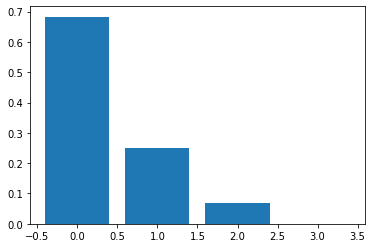

In [188]:
# Plot the variance explained by each component.
ind = np.arange(num_components)
num_components=len(my_pca_2.explained_variance_ratio_)
plt.bar(ind, vals);

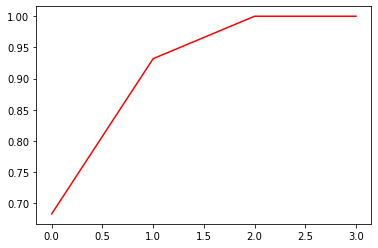

In [189]:
# Plot the cumulative variance explained by all the components.
ind = np.arange(num_components)
vals = my_pca_2.explained_variance_ratio_
cumvals = np.cumsum(vals)
plt.plot(ind, cumvals, c='r');

In [0]:
# Define scree plot function
def scree_plot(pca):

    num_components=len(my_pca_2.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals, c='r')
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)





    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

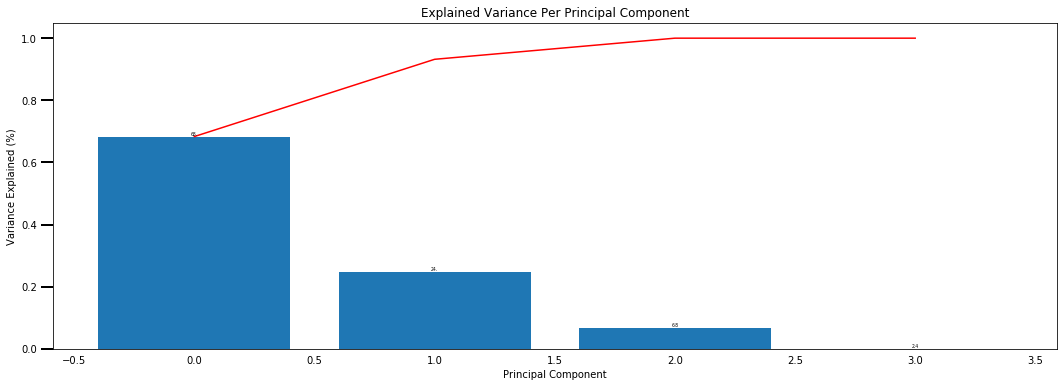

In [191]:
# Apply the plot function to our principle component
#the green lines are to help me see where the explained variance is greater than 90%
scree_plot(my_pca_2)

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. 

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [192]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
#Imports
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

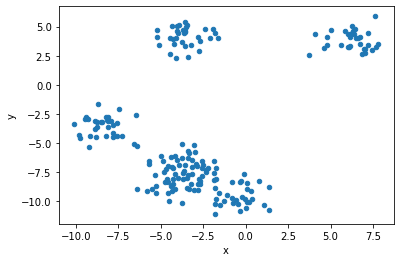

In [194]:
#Data exploration: find the number of clusters
features = ['x', 'y']
points[features].plot(kind="scatter", x = features[0], y = features[1]);

In [195]:
#run an elbow test to determine how many centroids we should use
#make the two features into a new dataframe that can be fed into the fit() function
df2 = points[features]

df2.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
sum_of_squared_distances = [] #make an empty list
K = range(1,15) #the optimal number of centroids in this case is probably between 1 and 15
for k in K:
  km = KMeans(n_clusters=k) #set the number of clusters to k
  km = km.fit(df2)
  sum_of_squared_distances.append(km.inertia_)

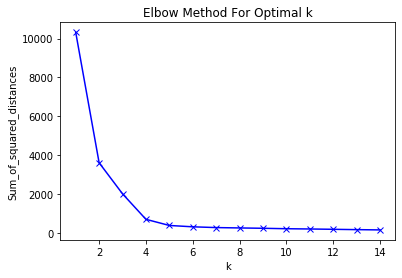

based on this, the major inflection point is at x = 4, so we will use 4 clusters


In [197]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print('based on this, the major inflection point is at x = 4, so we will use 4 clusters')

In [0]:
#initialize an instance of the KMeans class from sklearn
k = 4
model = KMeans(n_clusters = k, max_iter=1)

In [199]:
#Fit the instantiated model to points
model.fit(points.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [200]:
#assign clusters back to our dataframe
points['cluster'] = model.labels_
points.head()

,x,y,cluster
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,0
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,0


In [0]:
#get our centroids
centroids = model.cluster_centers_

In [202]:
#turn them into a dataframe
cent_points = pd.DataFrame(centroids)
cent_points.head() 

,0,1
0,-2.733593,-8.204353
1,6.249793,3.844572
2,-3.597407,4.133441
3,-8.366530,-3.612381


In [0]:
#set up some colors for plotting
base_colors = ['r', 'b', 'g', 'k']
colors = [base_colors[centroid] for centroid in model.labels_]

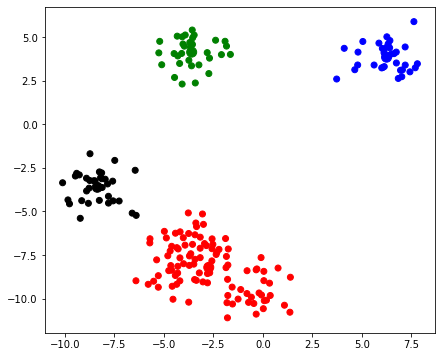

In [204]:
#plot the scatter of our points with calculated centroids
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(points[features[0]], points[features[1]], c=colors)
ax.scatter(cent_df2[0], cent_df2[1], c=base_colors, s=100);

In [205]:
#silhouette score
from sklearn import metrics
metrics.silhouette_score(points, model.labels_, metric='euclidean')

0.7222950448464026

# Stretch Goals (AKA how to get a 3):

Complete the stretch goals for each section in order to get a 3 on that section.

## Parts 1 & 2 (do all of the following): 
  - Comment your code well with both markdown and inline comments where appropriate
  - Show your work with code and possibly LaTeX 
  - Justify your answers particularly well to show advanced mastery of this section

## Part 3 (do all of the following): 
 - Create a Scree Plot to show the Proportion of Explained Variance of each Principal Component (more than the first two)
    - If you want to include a the cumulative proportion of explained variance, you might be interested in this NumPy Function: [numpy.cumsum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
 - Give a top-notch explanation of eigenvalues and eigenvectors. Feel free to any materials, images, code, graphs, LaTeX, etc. to spruce up your answer.

## Part 4 (do all of the following):
- Justify your choice of k, both visually (scatterplot) and mathematically (elbow plot).